In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn

from glob import glob 
import os
import tqdm as tqdm 

import numpy as np
import scipy.ndimage

import sys
sys.path.append('../scripts')
import load_utils

In [2]:
PATHS = {
    'DATA': '/home/ubuntu/cdata/DM_Data/RIII',
    'DESC': '../data/REPRISEIIISizes.xlsx'
}

In [18]:
patient_id = '0159R3027'
patient, meta = load_utils.load_patient(PATHS['DATA'], patient_id, metadata=True)

meshs = glob(os.path.join(PATHS['DATA'], patient_id, '*_A.stl'))
meshs = load_utils.load_mesh(meshs[0], meta) 

In [26]:
meshs, _ = scipy.ndimage.label(meshs)
idx = np.argmax(np.bincount(meshs.flatten())[1:]) + 1
meshs = meshs == idx
zss = np.array(np.where(meshs)).T

n = 7
cell_size = 100

cell = np.zeros(shape=(2, cell_size, cell_size))
maze = np.zeros(shape=(2, cell_size * n, cell_size * n))

frequency = 3 # one out of `frequency` will be positive
slices = np.random.choice(zss[:, 0], size=n ** 2)

zxy = np.zeros(shape=(3,), dtype=np.int16)

for i, zslice in enumerate(slices):
    if not np.random.randint(frequency):
        zxy = zss[zss[:, 0] == zslice]
        zxy = zxy[np.random.choice(len(zxy))]
    else:
        zxy[0] = zslice
        zxy[1:] = np.random.choice(patient.shape[-1], size=2)
        
    zxy[1:] = np.clip(zxy[1:] - cell_size // 2, 0, patient.shape[-1] - cell_size)
    cell[0] = patient[
        zxy[0], 
        zxy[1]: zxy[1] + cell_size, 
        zxy[2]: zxy[2] + cell_size
    ]
    cell[1] = meshs[
        zxy[0], 
        zxy[1]: zxy[1] + cell_size, 
        zxy[2]: zxy[2] + cell_size
    ]
    if np.random.randint(2):
        np.flip(cell, axis=1)
    if np.random.randint(2):
        np.flip(cell, axis=2)
    maze[
        :,
        (i // n) * cell_size: (i // n + 1) * cell_size, 
        (i % n) * cell_size: (i % n + 1) * cell_size
    ] = cell.copy()
    

# for i in 

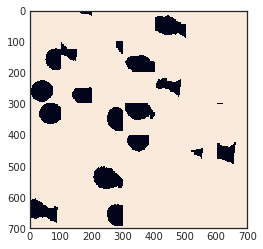

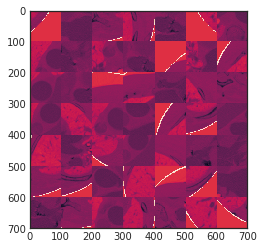

In [27]:
seaborn.set_style('white')
plt.imshow(-maze[1])
plt.show()
plt.imshow(-maze[0])
plt.show()

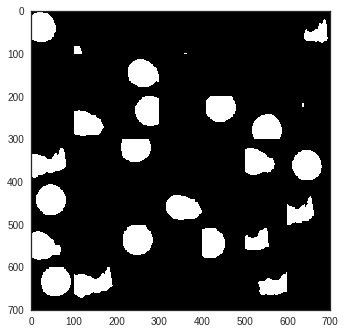

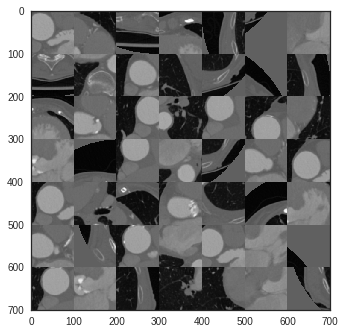

In [66]:
seaborn.set_style('white')
plt.imshow(-maze[1])
plt.show()
plt.imshow(-maze[0])
plt.show()